<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# IBM Capstone - Assignment - Week 3 

<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Introduction/Problem statement</a></li>
    <li><a href="#ref2">Data Description</a></li>
    <li><a href="#ref3">Methodology</a></li>
    <li><a href="#ref4">Results and Discussion</a></li>
    <li><a href="#ref5">Recommendations</a></li>
    <li><a href="#ref6">Conclusions</a></li>
</ul>
For better understanding the results, the analysis will also be put along with outputs in the methodology part. In Results and Discussion section, the analysis will be summarized. Conclusion section will summarize major operations and findings from this project.

## Introduction/Problem statement

A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.[1]<br>

Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.[2]<br>

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.[2]<br>

More than 90% of road traffic deaths occur in low- and middle-income countries. Road traffic injury death rates are highest in the African region. Even within high-income countries, people from lower socioeconomic backgrounds are more likely to be involved in road traffic crashes. Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years. From a young age, males are more likely to be involved in road traffic crashes than females. About three quarters (73%) of all road traffic deaths occur among young males under the age of 25 years who are almost 3 times as likely to be killed in a road traffic crash as young females.[2]<br>

Due to huge losses caused by traffic collision, it is quite important to know the impacts of different factors which result in these collisions and make some effective recommendations to prevent these tragedies.<br>

Usually, a number of factors contribute to the risk of collisions, including vehicle design, speed of operation, road design, road environment, driving skills, impairment due to alcohol or drugs, and behavior, notably distracted driving, speeding and street racing.[1][3]<br>

Generally, there are two tpyes of factors. One is related to the personal behaviors like over-confidence, speeding, driving skills, drinking alcohol, etc. The other one is related to environmental conditions such as road design, road environment, weather and light.<br>

Given that the importance of personal behaviors has been recognized by the public from long time ago, there are a lot of  educational methods and legal regulations to reduce traffic collisions. This project aims to analyze the influences of environmental conditions on traffic collisions and then provide more specific recommendations to urban planners or traffic department to improve the conditions to reduce traffic collisions.<br>

[1]https://en.wikipedia.org/wiki/Traffic_collision<br>
[2]https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries<br>
[3]https://www.sciencedirect.com/science/article/pii/S0001457518300873#:~:text=What%20are%20the%20main%20contributing,the%20collisions%20of%20older%20drivers <br>

## Data Description

The dataset used in this project is "Data-Collisions.csv" from week 1 in this course. You can get data by clicking <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">HERE</a>.

There are 37 attributes in the given table, which include location (X and Y), timestamps, severity types, weather, light, road conditions, etc.<br>

Among these attributes:
- SEVERITYCODE and COLLISIONTYPE can be used as dependent variables to indicate the severity of the traffic collisions; 
- WEATHER, ROADCOND, LIGHTCOND, ADDRTYPE can be used as independent variables to show how environmental conditions influence the severity of the collisions; 
- INCDATE can be used as temporal variables to show how the severity of collisions change along temporal dimensions. <br>

With the data, it is possible to realize the goal of this project, which is to analyze the influences of environmental conditions on traffic collisions and then provide more specific recommendations to urban planners or traffic department to improve the conditions to reduce traffic collisions.

## Methodology

### Process

1 Data preparation

1.1 Dealing with missing data<br>
1.2 One-hot encoding data<br>

2 Exploratory analysis

2.1 Time series analysis<br>
2.2 Regression analysis<br>

3 Making models 

3.1 Build KNN model for classification of original categorical data<br>
3.2 Build multiple linear regression models for monthly aggregated data<br>
3.3 Evaluate accuracies<br>

### Libraries

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns

# for building and evaluating knn models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# for building and evaluating linear models
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

### Helper functions

In [2]:
def recognize_missing_data(df):
    
    missing_data = df.isnull()
    columns = missing_data.columns.values.tolist()
    df_missing = []

    for column in columns:
        missing_column = missing_data[column].value_counts()
        df_missing.append(missing_column)

    df_missing = pd.DataFrame(df_missing)
    
    return df_missing

def get_df_onehot(features, df):
    
    features_onehot = []

    for i in range(len(features)):
        feature = pd.get_dummies(df[features[i]])
        features_onehot.append(feature)

    df_onehot = pd.concat(features_onehot, axis=1)

    return df_onehot

def get_grouped_numbers(headers, df):
    
    df_feature_list = []
    
    for head in headers:
        df_feature = df[head].value_counts()
        print(head)
        print(df_feature)
        print("")
        df_feature_list.append(df_feature)
        
    return df_feature_list

def get_time_onehot_df(timestamp, df_time, df_onehot):
    
    # add time data
    df_time_onehot = pd.concat([df_time, df_onehot], axis=1)

    # use time data (INCDATE) as index for further temporal analysis
    df_time_onehot[timestamp] = pd.to_datetime(df_time_onehot[timestamp])
    df_time_onehot.index = df_time_onehot[timestamp]
    df_time_onehot.drop(timestamp, axis = 1, inplace=True)

    return df_time_onehot

def visualize_features(feature, df_onehot_time, categorical_vars):
    
    features = categorical_vars[feature]

    for i in range(len(features)):
        df_onehot_time[features[i]].plot(linewidth=1);
        
    plt.xlabel("Time")
    plt.ylabel("Collision numbers")
    plt.title("Number of collisions for " + feature)
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
def KNN(k, X_train,y_train, X_test, y_test):
    
    #Train Model and Predict - get accuracy of training and testing dataset
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
    test_acc = metrics.accuracy_score(y_test, yhat)
    
    return train_acc, test_acc

def get_train_test_accuracy_list(k, X_train,y_train, X_test, y_test):

    train_acc_list = []
    test_acc_list = []

    for i in range(k):
        k = i+1
        train_acc, test_acc = KNN(k, X_train,y_train, X_test,y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    return train_acc_list, test_acc_list

def visualize_train_test_accuracy(train_acc_list, test_acc_list):

    plt.plot(train_acc_list,'g*', test_acc_list, 'ro')
    plt.show() 
    plt.pause(0.5)

def get_test_mean_std_accuracy(k, X_train, y_train, X_test, y_test):
    
    mean_acc = np.zeros((k-1))
    std_acc = np.zeros((k-1))
    ConfustionMx = [];
    
    for n in range(1,k):

        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    return mean_acc, std_acc

def visualize_test_mean_std_accuracy(k, mean_acc, std_acc):
    
    plt.plot(range(1, k), mean_acc, 'g')
    plt.fill_between(range(1, k), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.show()
    plt.pause(0.5)
    
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### 1 Data preparation

In [3]:
# Import experimental data
# only keep features: 
# SEVERITYCODE, and COLLISIONTYPE - dependent varibles
# WEATHER, ROADCOND, LIGHTCOND, ADDRTYPE - independent varibles
# INCDATE - time dimensions
path = 'Data-Collisions - selected.csv'
df = pd.read_csv(path)
df.head(5)

,SEVERITYDESC,INCDATE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE
0,Injury Collision,2004/01/01 00:00:00+00,Overcast,Dry,Daylight,Other,Block
1,Property Damage Only Collision,2004/01/01 00:00:00+00,Unknown,Ice,Dark - Street Lights On,Parked Car,Block
2,Property Damage Only Collision,2004/01/01 00:00:00+00,Raining,Wet,Daylight,Rear Ended,Block
3,Property Damage Only Collision,2004/01/01 00:00:00+00,Raining,Wet,Dark - Street Lights On,Angles,Intersection
4,Injury Collision,2004/01/01 00:00:00+00,Overcast,Wet,Dark - Street Lights On,Parked Car,Block


### 1.1 Dealing with missing data

In [4]:
# print all unique values of categorical data - SEVERITYPESC, WEATHER, ROADCOND, LIGHTCOND, COLLISIONTYPE, ADDRTYPE
# to find the unique values representing missing values
headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE']
for head in headers:
    print(head, "unique values:\n", df[head].unique(), "\n")

SEVERITYDESC unique values:
 ['Injury Collision' 'Property Damage Only Collision'] 

WEATHER unique values:
 ['Overcast' 'Unknown' 'Raining' 'Clear' 'Snowing'
 'Sleet/Hail/Freezing Rain' 'Other' 'Fog/Smog/Smoke' 'Severe Crosswind'
 'Blowing Sand/Dirt' nan 'Partly Cloudy'] 

ROADCOND unique values:
 ['Dry' 'Ice' 'Wet' 'Snow/Slush' 'Unknown' 'Other' 'Sand/Mud/Dirt' 'Oil'
 'Standing Water' nan] 

LIGHTCOND unique values:
 ['Daylight' 'Dark - Street Lights On' 'Unknown' 'Dawn' 'Dusk'
 'Dark - No Street Lights' 'Dark - Street Lights Off' 'Other' nan
 'Dark - Unknown Lighting'] 

COLLISIONTYPE unique values:
 ['Other' 'Parked Car' 'Rear Ended' 'Angles' 'Left Turn' 'Sideswipe'
 'Head On' 'Pedestrian' 'Cycles' 'Right Turn' nan] 

ADDRTYPE unique values:
 ['Block' 'Intersection' nan 'Alley'] 



In [5]:
# from the above unique values, it can be found that besides nan, 
# "Unknown" values are also missing values. Because their meanings are unclear.
# therefore, here uses nan to replace "Other" and "Unknown"
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)
df.replace("Dark - Unknown Lighting", np.nan, inplace = True)

In [6]:
# print number of missing values for all columns 
df_missing = recognize_missing_data(df)
df_missing

,False,True
SEVERITYDESC,194673.0,NaN
INCDATE,194673.0,NaN
WEATHER,173669.0,21004.0
ROADCOND,174451.0,20222.0
LIGHTCOND,175784.0,18889.0
COLLISIONTYPE,166066.0,28607.0
ADDRTYPE,192747.0,1926.0


In [7]:
# because the dataset is quite big, so in this case, these missing values are simply deleted
for head in headers:
    df.dropna(subset=[head], axis=0, inplace=True)

In [8]:
# print number of missing values for all columns to check whether there are missing values left 
df_missing = recognize_missing_data(df)
df_missing

,False
SEVERITYDESC,146877
INCDATE,146877
WEATHER,146877
ROADCOND,146877
LIGHTCOND,146877
COLLISIONTYPE,146877
ADDRTYPE,146877


In [9]:
# show the numbers of collision events under differnt features
df_feature_list = get_grouped_numbers(headers, df)

SEVERITYDESC
Property Damage Only Collision    102824
Injury Collision                   44053
Name: SEVERITYDESC, dtype: int64

WEATHER
Clear                       95358
Raining                     27300
Overcast                    23021
Snowing                       634
Fog/Smog/Smoke                426
Sleet/Hail/Freezing Rain       79
Blowing Sand/Dirt              39
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

ROADCOND
Dry               106612
Wet                38831
Ice                  691
Snow/Slush           639
Standing Water        50
Sand/Mud/Dirt         31
Oil                   23
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    99874
Dark - Street Lights On     38090
Dusk                         4948
Dawn                         1977
Dark - No Street Lights      1081
Dark - Street Lights Off      907
Name: LIGHTCOND, dtype: int64

COLLISIONTYPE
Angles        33748
Parked Car    33524
Rear Ended    3

In [10]:
# reset index, because of dropping rows
df.reset_index(drop=True, inplace=True)

### 1.2 One-hot encoding data
The aim of one-hot encoding is for time series analysis and modelling.

In [11]:
# store temporal data for df
df_time = df[["INCDATE"]]

In [12]:
# df_features is for section 2.1 general analysis
features = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
df_features = df[features]
df_features

,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE
0,Property Damage Only Collision,Raining,Wet,Daylight,Rear Ended,Block
1,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On,Angles,Intersection
2,Injury Collision,Overcast,Wet,Dark - Street Lights On,Parked Car,Block
3,Property Damage Only Collision,Overcast,Wet,Dark - Street Lights On,Rear Ended,Block
4,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On,Angles,Intersection
...,...,...,...,...,...,...
146872,Property Damage Only Collision,Raining,Wet,Daylight,Angles,Intersection
146873,Property Damage Only Collision,Overcast,Dry,Daylight,Left Turn,Intersection
146874,Property Damage Only Collision,Clear,Dry,Daylight,Angles,Intersection
146875,Property Damage Only Collision,Clear,Dry,Daylight,Angles,Intersection


In [13]:
df_onehot = get_df_onehot(features, df_features)

In [14]:
# delete variables with amount less than 100
variables_ls_100 = ["Fog/Smog/Smoke", "Sleet/Hail/Freezing Rain", "Blowing Sand/Dirt", "Severe Crosswind", "Partly Cloudy",
                    "Standing Water", "Sand/Mud/Dirt", "Oil", "Alley"]
for var_ls_100 in variables_ls_100:
    df_onehot.drop(var_ls_100, axis = 1, inplace=True)

In [15]:
df_onehot.head()

,Injury Collision,Property Damage Only Collision,Clear,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,...,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# save unique values as a list for each categorical variable for time exploratory analysis
categorical_vars = {'SEVERITYDESC': ['Property Damage Only Collision', 'Injury Collision'],
 'WEATHER': ['Raining', 'Overcast', 'Clear', 'Snowing'],
 'ROADCOND': ['Wet', 'Dry', 'Ice', 'Snow/Slush'],
 'LIGHTCOND': ['Daylight', 'Dark - Street Lights On', 'Dawn', 'Dusk', 'Dark - Street Lights Off', 'Dark - No Street Lights'],
 'COLLISIONTYPE': ['Rear Ended', 'Angles', 'Parked Car', 'Left Turn', 'Sideswipe', 'Head On', 'Pedestrian', 'Cycles', 'Right Turn'],
 'ADDRTYPE': ['Block', 'Intersection']
}

### 2 Exploratory analysis

### 2.1 Time series analysis

In [17]:
timestamp = "INCDATE"
df_time_onehot = get_time_onehot_df(timestamp, df_time, df_onehot)
df_time_onehot.head() 

,Injury Collision,Property Damage Only Collision,Clear,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,...,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection
INCDATE,,,,,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00+00:00,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2004-01-01 00:00:00+00:00,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2004-01-01 00:00:00+00:00,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2004-01-01 00:00:00+00:00,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2004-01-01 00:00:00+00:00,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 5)})

# resample date data by year
df_onehot_year = df_time_onehot.resample('Y').sum()
# resample date data by month
df_onehot_month = df_time_onehot.resample('M').sum()
# resample date data by week
df_onehot_week = df_time_onehot.resample('W').sum()

#### What can we see from curves of two types of collisions with different aggregation?

From df_onehot_year, overall, it can be found that the annual numbers of both two types of collisions have decreased from 2004 to 2019. (Data for 2020 is not completed.) The annual numbers of property damage only collision (property collision) are all much higher than that of injury collision. The fluctuation of property collision is bigger than that of injury collision. <br>

From df_onehot_month, it can be seen some "periodic cycles" like sin or cos curves on both two types. It indicates that the numbers of collisions are related to periodic factors. At the same time, we can see that the peaks and valleys are mostly matched in terms of time. <br>

From df_onehot_week, "periodic cycles" are still there but more noisy than monthly aggregation. Therefore, the following analysis for other variables will use montly aggregated data. <br>

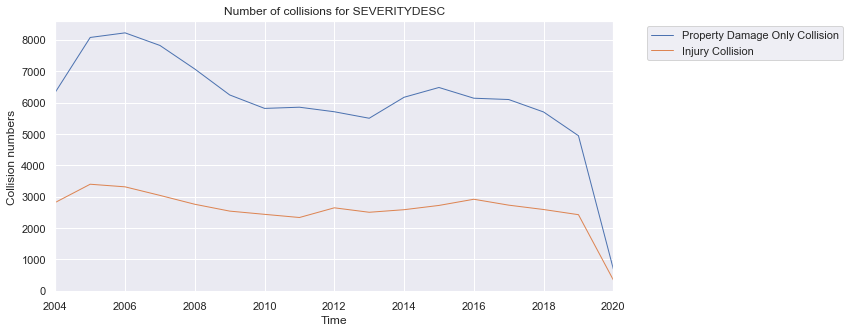

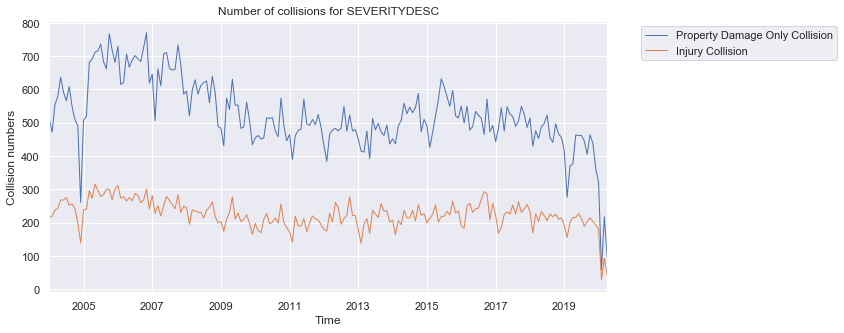

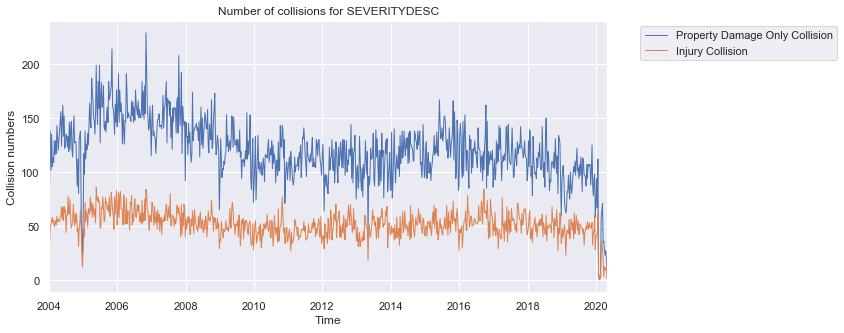

In [19]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[0]
df_onehot_time = df_onehot_year
visualize_features(feature, df_onehot_time, categorical_vars)

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

df_onehot_time = df_onehot_week
visualize_features(feature, df_onehot_time, categorical_vars)

#### Weather
It can be observed that the occurrence of "Raining" is totally different from other weather conditions. This patterns are near the patterns of climate in Seattle.[Seattle, WA, USA, NOAA]. So we can see that the peak of "clear" usually occur in summer and autumn while the peak of other variables usually occur in spring and winter. The number of "snowing" is quite low.
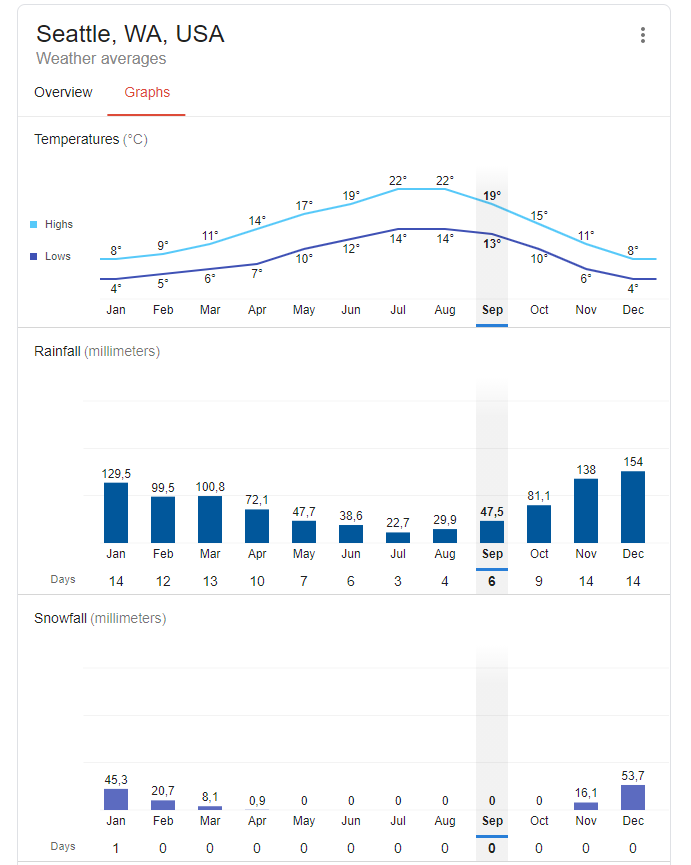

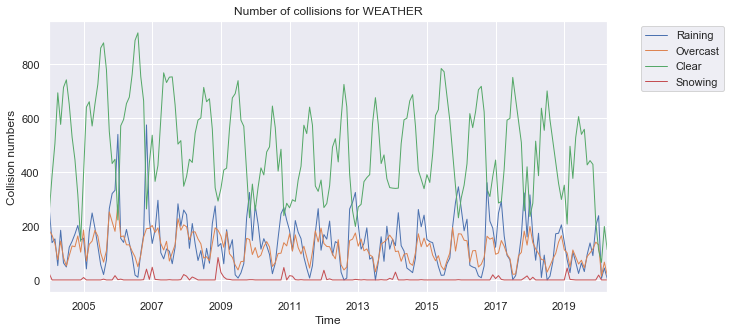

In [21]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[1]

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

#### Road
It can be observed that the patterns of road conditions are quite similar to that of weather conditions. In most cases, the weather conditions decide the road conditions.

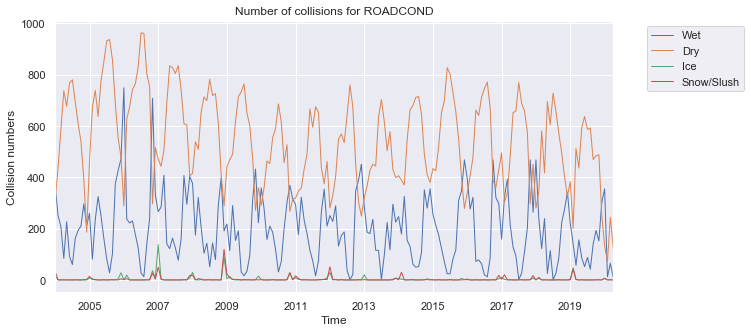

In [46]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[2]

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

#### Light
It can be observed that the patterns of light are also periodic. This is mainly related to the location of Seattle, which decides the daily light time. Besides, it can be seen that the numbers of "Dark-Street Lights Off" and "Dark-No Street Lights" are quite low compared to other conditions. This indicates that the possibility of collisions caused by no street light is quite low. And thus increasing street light may not help reduce collisions a lot.
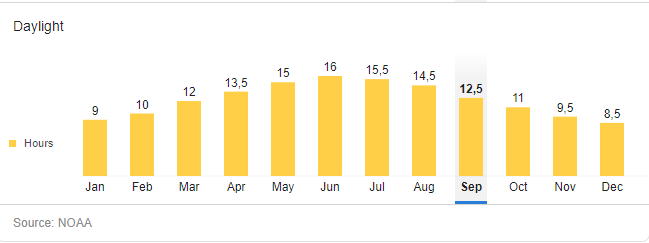

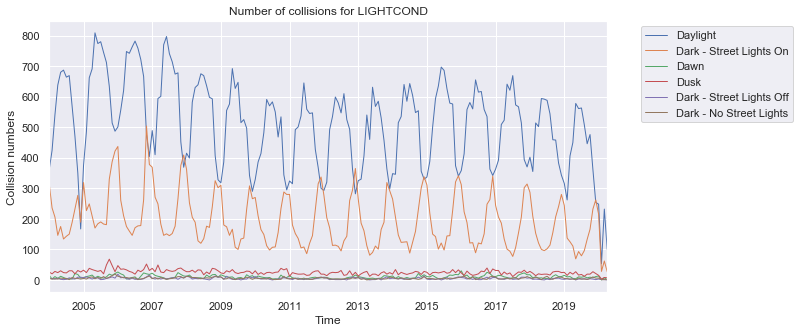

In [22]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[3]

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

#### Collision types
It can be observed that there are mainly three categories for these types. The curve of category one (Rear Ended, Angles, Parked Car) is quite similar to property collision while the curve category two (left turn and sideswipe) is quite similar to injury collision. These similarities are interesting to be analysed deeper.

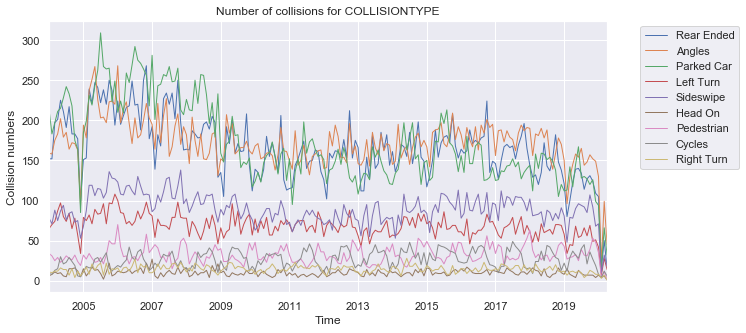

In [23]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[4]

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

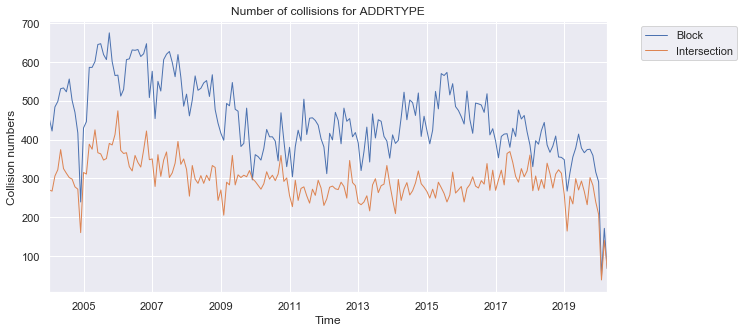

In [24]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
feature = headers[5]

df_onehot_time = df_onehot_month
visualize_features(feature, df_onehot_time, categorical_vars)

#### The similarities in shapes of curves of two types of collisions and environmental conditions 
After trials, the curve shape of property collision is similar to that of "clear", "daylight", "dry" and "block". The curve shape of injury collision is similar to that of "intersection". These similarities may indicate the relations between these variables. More researches are needed to dig out them. But if assuming there are some causal relationships, then it may reveal that property collisions tend to happen when environmental conditions are "good" for driving. The potential reason may be that people don't pay enough attention to driving due to over-confidence. If assuming property collisons are less severe than injury collisions, then it may be concluded that good environmental conditions may let people be over-confident on driving. And the collsiions caused by the over-confidence are not as severe as the collisions caused by bad environmental conditions. Because weather plays an important role in deciding environmental conditions, so the curves of property collisions look more periodic and the numbers are much more than injury collisions. 

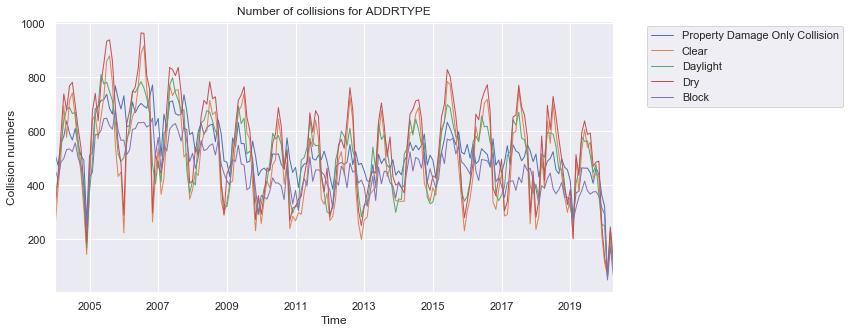

In [25]:
# Features with similar time series curves to that of Property Damage Only Collision 
severity = headers[0] # "SEVERITYDESC"
features = categorical_vars[severity]
df_onehot_month[features[0]].plot(linewidth=1);

df_onehot_month["Clear"].plot(linewidth=1);
df_onehot_month["Daylight"].plot(linewidth=1);
df_onehot_month["Dry"].plot(linewidth=1);
df_onehot_month["Block"].plot(linewidth=1);
        
plt.xlabel("Time")
plt.ylabel("Collision numbers")
plt.title("Number of collisions for " + feature)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

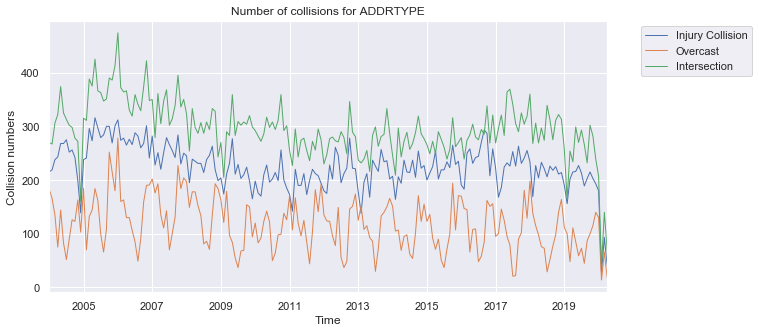

In [83]:
# Features with similar time series curves to that of Injury Collision
sns.set(rc={'figure.figsize':(10, 5)})
severity = headers[0] # "SEVERITYDESC"
features = categorical_vars[severity]
df_onehot_month[features[1]].plot(linewidth=1);

df_onehot_month["Overcast"].plot(linewidth=1);
#df_onehot_month["Dark - Street Lights On"].plot(linewidth=1);
df_onehot_month["Intersection"].plot(linewidth=1);
        
plt.xlabel("Time")
plt.ylabel("Collision numbers")
plt.title("Number of collisions for " + feature)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.2 Regression analysis

This section analyzed the linear correlations between different variables. But overall, there are no obvious findings from these results except some common knowledge like findings. For example, weather "raining" and road "dry" have a coefficient -0.65. These results may reveal that for data with time series, simple linear regression may not work well.

In [27]:
# headers = ['SEVERITYDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE'] 
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(12,8)})

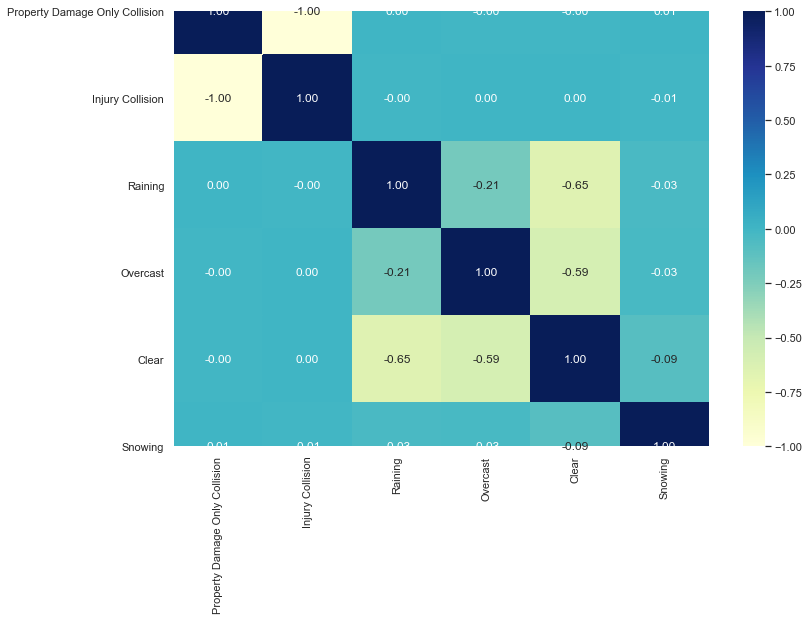

In [28]:
# print all correlations between collision types and weather features
features = categorical_vars[headers[0]] + categorical_vars[headers[1]]
df_two = df_time_onehot[features]

sns.heatmap(df_two.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

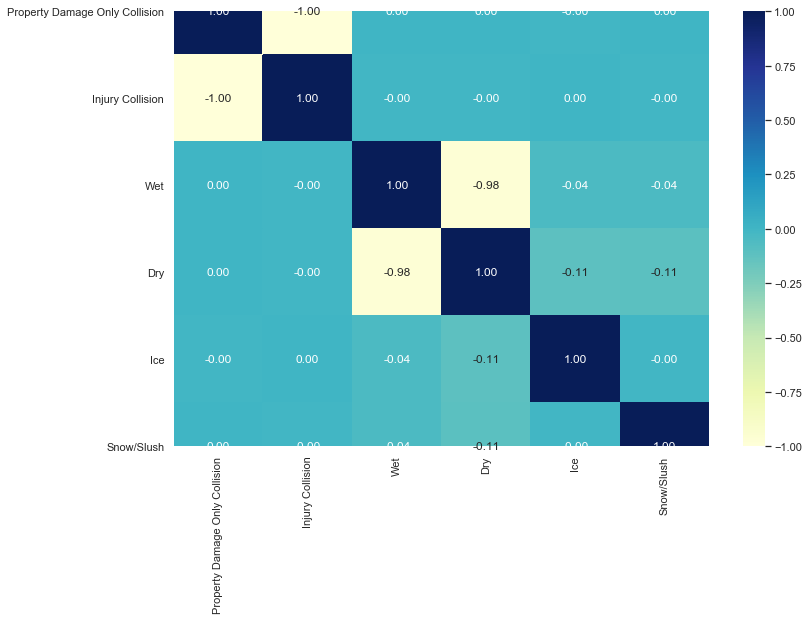

In [29]:
# print all correlations between collision types and road conditions features
features = categorical_vars[headers[0]] + categorical_vars[headers[2]]
df_two = df_time_onehot[features]

sns.heatmap(df_two.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

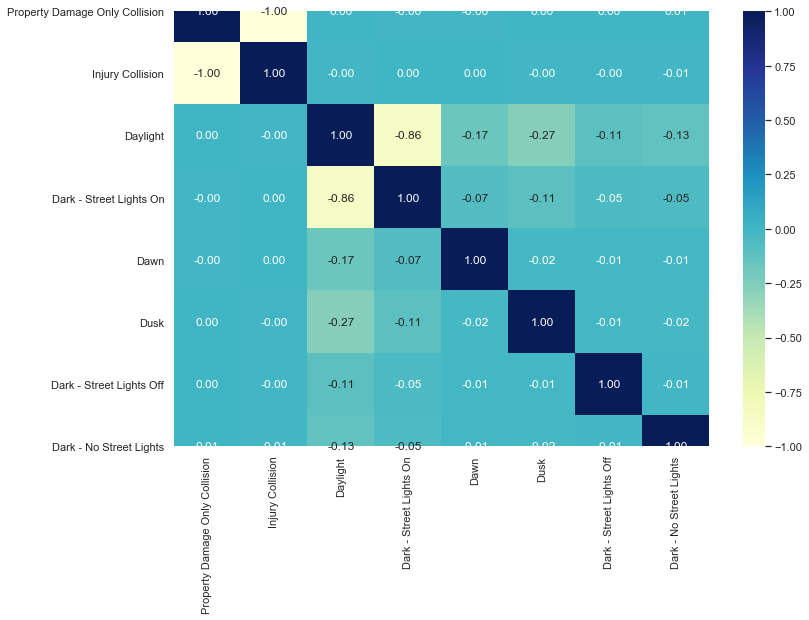

In [30]:
# print all correlations between collision types and light conditions features
features = categorical_vars[headers[0]] + categorical_vars[headers[3]]
df_two = df_time_onehot[features]

sns.heatmap(df_two.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

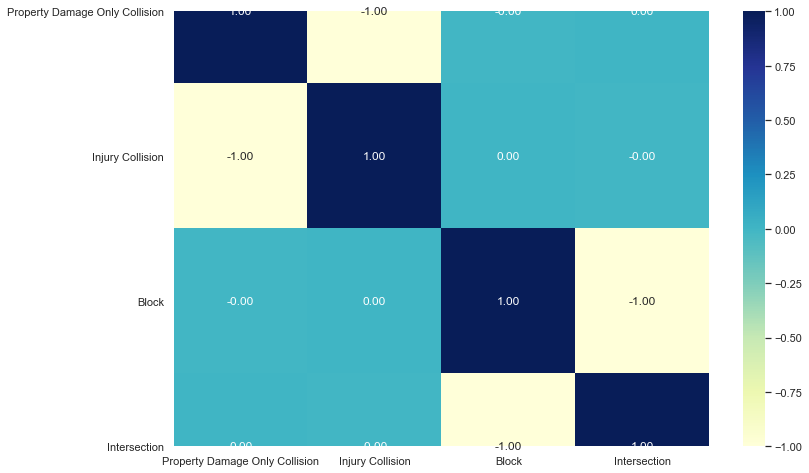

In [31]:
# print all correlations between collision types and address types features
features = categorical_vars[headers[0]] + categorical_vars[headers[5]]
df_two = df_time_onehot[features]

sns.heatmap(df_two.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

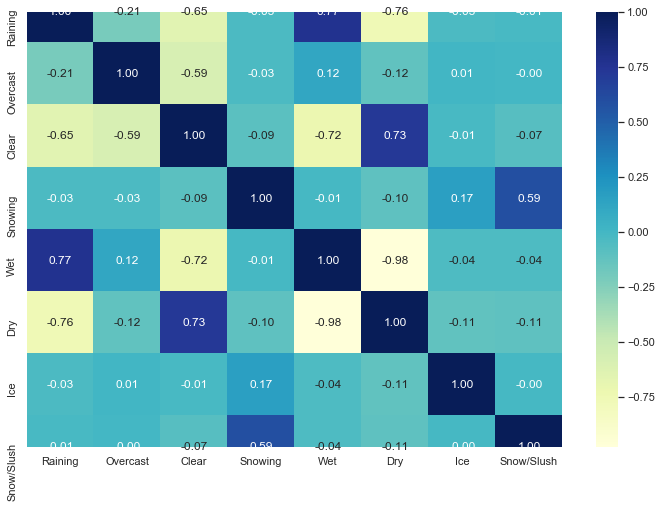

In [32]:
# print all correlations between weather types and  road conditions
features = categorical_vars[headers[1]] + categorical_vars[headers[2]]
df_two = df_time_onehot[features]

sns.heatmap(df_two.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

### 3 Making models 

### 3.1 Build KNN model for classification of original categorical data
Build classification models for categorical data (without monthly aggregated). - df_onehot

In [113]:
# set dependent variables (collision types) and independent variables - environmental conditions
variables = df_onehot.columns
X = df_onehot[variables[2:]].values 
y = df_onehot[variables[:2]].values 
X.astype("float")
y.astype("float")

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (117501, 25) (117501, 2)
Test set: (29376, 25) (29376, 2)


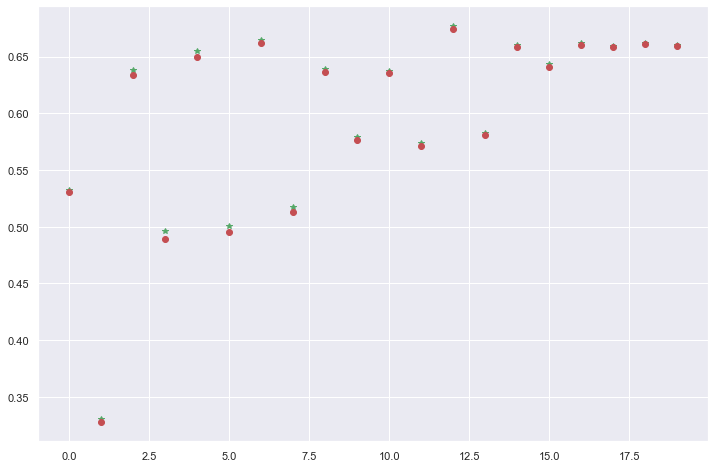

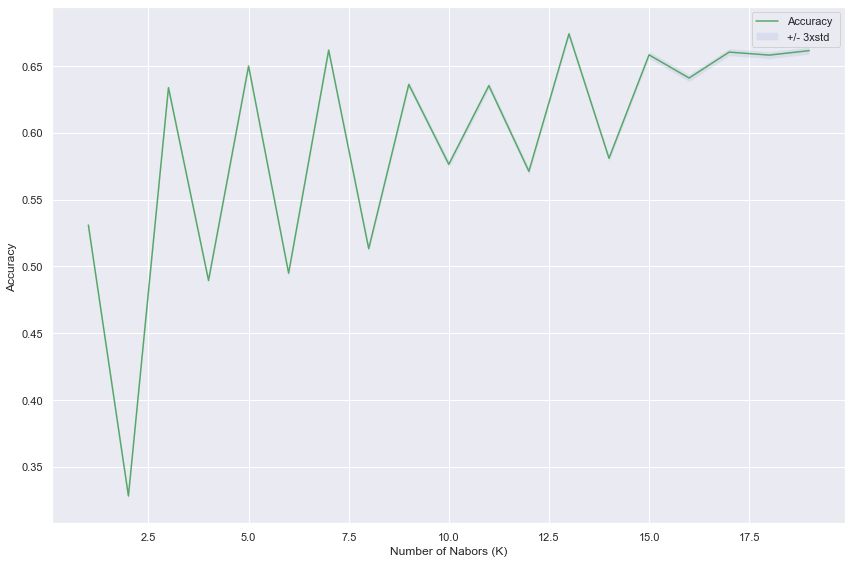

The best accuracy was with 0.6740876906318083 with k= 13


In [65]:
# test k values from 0 to 20 to find a suitable k which make makes testing accuracy 
k = 20
train_acc_list, test_acc_list = get_train_test_accuracy_list(k, X_train,y_train, X_test, y_test)
visualize_train_test_accuracy(train_acc_list, test_acc_list)

mean_acc, std_acc = get_test_mean_std_accuracy(k, X_train, y_train, X_test, y_test)
visualize_test_mean_std_accuracy(k, mean_acc, std_acc)

In [ ]:
# train the model with all available data with k calculated above
# this trained model can be used for users to test the probability of a certain set of environmental conditions can 
# lead to traffic collisions
k = 13
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X, y)

### 3.2 Build multiple linear regression models for monthly aggregated data
Build multiple regression models for monthly aggregated data - df_onehot_month.

In [69]:
# pre-process training and testing data 
# convert the data types to float and do normalization
variables = df_onehot_month.columns
X = df_onehot_month[variables[2:]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df_onehot_month[variables[:2]].values 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (156, 25) (156, 2)
Test set: (40, 25) (40, 2)


In [108]:
# with sklearn
multi_linear_model = linear_model.LinearRegression()
multi_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What does this multiple linear regression model tell us?
The X variables have been normalized before being applied to the model. So, the weights shown in the below table can reveal the importance of a certain varibale on the occurance of traffic collisions.<br>

But as mentioned above, the linear regression may not be suitable for this case. So, the values of the weights cannot provide a clear insight though the accuracy is not low.

In [109]:
coefficients = pd.DataFrame(multi_linear_model.coef_[:, :13], columns=columns[2:15], index=["Injury Collision", "Property Damage Only Collision"])
print(coefficients)

                                    Clear  Overcast   Raining   Snowing  \
Injury Collision               -14.457162 -3.877285 -9.955556  3.494033   
Property Damage Only Collision  14.457162  3.877285  9.955556 -3.494033   

                                       Dry        Ice  Snow/Slush         Wet  \
Injury Collision                360.545568  27.968318   20.977232  264.202792   
Property Damage Only Collision -360.545568 -27.968318  -20.977232 -264.202792   

                                Dark - No Street Lights  \
Injury Collision                              -3.416603   
Property Damage Only Collision                 3.949881   

                                Dark - Street Lights Off  \
Injury Collision                               -4.401069   
Property Damage Only Collision                  4.947450   

                                Dark - Street Lights On      Dawn   Daylight  
Injury Collision                             -31.072708 -1.501542 -59.998332  
Property Dama

In [110]:
coefficients = pd.DataFrame(multi_linear_model.coef_[:, 13:], columns=columns[15:], index=["Injury Collision", "Property Damage Only Collision"])
print(coefficients)

                                    Dusk     Angles     Cycles    Head On  \
Injury Collision               -2.653365 -51.134256 -16.673632  -7.136045   
Property Damage Only Collision  4.058756  75.590338  25.425142  10.431165   

                                Left Turn  Parked Car  Pedestrian  Rear Ended  \
Injury Collision               -26.242889 -109.314552  -19.750121  -68.971935   
Property Damage Only Collision  37.895440  151.221451   28.336279  101.785917   

                                Right Turn  Sideswipe      Block  Intersection  
Injury Collision                -10.627652 -39.670071  66.611518     37.669887  
Property Damage Only Collision   14.437407  55.279158 -66.611518    -37.669887  


In [111]:
# multiple linear regression evaluation
yhat = multi_linear_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, yhat)
rmse = np.sqrt(metrics.mean_squared_error(y_test, yhat))
r2score = metrics.r2_score(y_test, yhat, multioutput='variance_weighted')

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2score)

MSE: 337.5248491191503
RMSE: 18.371849365786513
R2 score: 0.9606073750701526


In [112]:
# train the model with all available data 
# similar to KNN, this trained model can be used for users to test the probability of a certain set of environmental conditions can 
# lead to traffic collisions. Also, it can be used to predict how traffic collisions can change when climate changes.
multi_linear_model = linear_model.LinearRegression()
multi_linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h2>Results and Discussion</h2>

#### Collision severity
From df_onehot_year, overall, it can be found that the annual numbers of both two types of collisions have decreased from 2004 to 2019. The annual numbers of property damage only collision (property collision) are all much higher than that of injury collision. The fluctuation of property collision is more obvious than that of injury collision. <br>

From df_onehot_month, it can be seen some "periodic cycles" like sin or cos curves on both two types. It indicates that the numbers of collisions are related to periodic factors. At the same time, we can see that the peaks and valleys are mostly matched in terms of time. <br>

From df_onehot_week, "periodic cycles" are still there but more noisy than monthly aggregation. Therefore, the following analysis for other variables will use montly aggregated data. <br>

#### Weather
It can be observed that the occurrence of "Raining" is totally different from other weather conditions. This patterns are near the patterns of climate in Seattle. So we can see that the peak of "clear" usually occur in summer and autumn while the peak of other variables usually occur in spring and winter. The number of "snowing" is quite low.

#### Road
It can be observed that the patterns of road conditions are quite similar to that of weather conditions. In most cases, the weather conditions decide the road conditions.

#### Light
It can be observed that the patterns of light are also periodic. This is mainly related to the location of Seattle, which decides the daily light time. Besides, it can be seen that the numbers of "Dark-Street Lights Off" and "Dark-No Street Lights" are quite low compared to other conditions. This indicates that the possibility of collisions caused by no street light is quite low. And thus increasing street light may not help reduce collisions a lot.

#### Collision types
It can be observed that there are mainly three categories for these types. The curve of category one (Rear Ended, Angles, Parked Car) is quite similar to property collision while the curve category two (left turn and sideswipe) is quite similar to injury collision. These similarities are interesting to be analysed deeper.

#### The similarities in shapes of curves of two types of collisions and environmental conditions 
After trials, the curve shape of property collision is similar to that of "clear", "daylight", "dry" and "block". The curve shape of injury collision is similar to that of "intersection". These similarities may indicate the relations between these variables. More researches are needed to dig out them. But if assuming there are some causal relationships, then it may reveal that property collisions tend to happen when environmental conditions are "good" for driving. The potential reason may be that people don't pay enough attention to driving due to over-confidence. If assuming property collisons are less severe than injury collisions, then it may be concluded that good environmental conditions may let people be over-confident on driving. And the collsiions caused by the over-confidence are not as severe as the collisions caused by bad environmental conditions. Because weather plays an important role in deciding environmental conditions, so the curves of property collisions look more periodic and the numbers are much more than injury collisions. 

#### Regression analysis

This section analyzed the linear correlations between different variables. But overall, there are no obvious findings from these results except some common knowledge like findings. For example, weather "raining" and road "dry" have a coefficient -0.65. These results may reveal that for data with time series, simple linear regression may not work well.

The X variables have been normalized before being applied to the model. So, the weights shown in the below table can reveal the importance of a certain varibale on the occurance of traffic collisions.<br>

But as mentioned above, the linear regression may not be suitable for this case. So, the values of the weights cannot provide a clear insight though the accuracy is not low.

## Conclusions

This project aims to analyze how environmental conditions can influence the occurrances of traffic collisions. The following parts concluded the major content of each section and the findings from analysis.

1. Data Preparation

From original dataset provided in the course, there are many steps done to prepare data for this project. 
First, environmental conditions related variables were selected as independent variables. Second, recognize missing data and deal with them by deleting them from table due to large amount of existing data. Third, apply one-hot encoding to all variables because they are categorical data. Forth, calcuate the sum of these independent variables and delete the variables whose total number is less than 500. Because the amont is too low given the large amount of data.<br>
After all of the above steps, there are two dependent variables: Injury Collision, Property Damage Only Collision. And there are 25 independent variables related to environmental conditions. The total number of data is 146876. <br>

2. Time series analysis

Most of the curves of selected variables related to environmental conditions are periodic. The basic reason for is is related to the location and climate of Seattle.<br>
From the shapes of these curves of the variables, it can be found that property collisions tend to happen when environmental conditions are "good" for driving. Good environmental conditions may let people be over-confident on driving. And the collsiions caused by the over-confidence are not as severe as the collisions caused by bad environmental conditions. Because weather plays an important role in deciding environmental conditions, so the curves of property collisions look more periodic and the numbers are much more than injury collisions.<br>
The above conclusion was deferred from data only, more researches should be done to further explore the mechanism.


4. KNN model

To select the most suitable K value for this project, values from 1 to 20 have been tested. The number of training data is 117501; the number of testing data is 29376. The k which produced highested accuracy (accuracy_score=0.67) is 13. Then both training and testing data merged together trained the KNN model with k=13. The final trained model can be used for urban planners or traffic department to check the possibility of occurence of traffic collisions for different environmental conditions so as to make some preparations in advance.

4. Multiple linear model

Linear regression models may not work well for this case. The weights of trained models cannot help explain the influences of the variables on the occurrence of collisions. 